This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/6_clustering/)

# Iris data : KMEANS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


iris = datasets.load_iris()
x=iris.data

### Exercize
Vizualize the data. What dimension do they have ? Do they seem clustered ? Do they need to be normalized ? Apply PCA to it.

In [3]:
#Applying kmeans to the dataset / Creating the kmeans classifier

NbClust= 3 
kmeans = KMeans(n_clusters = NbClust, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [4]:

#Visualising the  3 first clusters wrt x1 X2
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 25, c = 'red', label = 'C0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'C1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 25, c = 'green', label = 'C2')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s =100, c = 'orange', label = 'Centroids')
plt.legend()

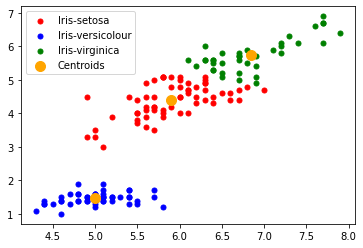

In [6]:
#Visualising the clusters x1, x3
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 25, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'orange', label = 'Centroids')

plt.legend();

### Exercize
Visualize the centroids in the PCA space. Would the results would have been any different if applying kmeans after PCA normalization: when keeping all components ? when keeping only a few components ?

### Model Selection

/home/kerivenn/anaconda3/lib/python3.8/site-packages/threadpoolctl.py:762: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


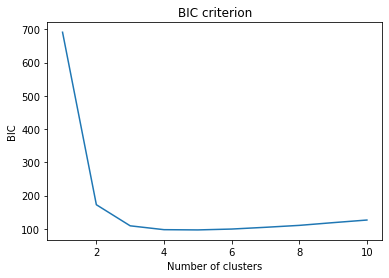

In [2]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    penK = x.shape[1]*i*np.log(x.shape[0])/2 # number of parameters times log of number of points
    wcss.append(kmeans.inertia_+penK)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('BIC criterion')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()


## Exercize 
- The BIC criterion from the above graph :  find the optimum number of clusters